Lo siguiente está basado en los libros:

* B. Rumbos, Pensando Antes de Actuar: Fundamentos de Elección Racional, 2009

* J. Albert & M. Rizzo, "R by Example", 2012

* G. J. Kerns, Introduction to Probability and Statistics Using R, 2014.

* M.D. Ugarte, A. F. Militino, A. T. Arnholt, Probability and Statistics with R", 2ed.

El libro de G. J. Kerns tiene github: [jkerns/IPSUR](https://github.com/gjkerns/IPSUR)

El libro de J. Albert & M. Rizzo tiene github: https://github.com/mariarizzo/RbyExample

El libro de M. D. Ugarte, A. F. Militino, A. T. Arnholttiene github de scripts [alanarnholt/PASWR2E-Rscripts](https://github.com/alanarnholt/PASWR2E-Rscripts)

Y en clases de [Felipe González](https://github.com/felipegonzalez). 

**Nota:**

* En algunas líneas no es necesario colocar `print` y sólo se ha realizado para mostrar los resultados de las funciones en un formato similar al de R pues la nota se escribió con *jupyterlab* y *R*.

In [1]:
library(ggplot2)

In [2]:
options(repr.plot.width=3.5, repr.plot.height=3.5) #esta línea sólo se ejecuta para jupyterlab con R

# Estadística

La Estadística **tiene por objetivo** la recolección, organización, resumen, análisis y presentación de los **datos** y proporciona herramientas y métodos para lo anterior.

**Comentario:** Es importante mencionar que el **objetivo** anterior puede pensarse como un flujo de trabajo unidireccional, esto es: recolectar -> organizar -> resumir -> analizar -> presentar; **sin embargo** considerarlo unidireccional **cierra las puertas** al proceso de mejoramiento de cada uno de los pasos involucrados, por lo que se prefiere un flujo de la forma:

(cuadros)

Al conjunto de todos los datos que se desean estudiar se le denomina **población**, asimismo, a cualquier subconjunto del total de datos se le conoce como **muestra**. Por ejemplo, las encuestas pretenden encontrar alguna **característica de interés** de una población -digamos votantes- por medio del análisis de una muestra.

La **estadística descriptiva** obtiene, organiza y presenta la información. La **inferencia estadística** prueba la validez -o la invalidez- de hipótesis que se tienen acerca de una población, con base a información de una o varias muestras.

# Tipos de datos y variables

Datos: información especializada y organizada (en alguna forma) para análisis o usada como base de una decisión. Un *dataset* es una colección de datos relacionados de alguna forma.

Para **estudiar características de los datos** la Estadística los representa por medio de **variables** las cuales pueden ser de dos tipos:

* **cuantitativas**: la variable mide una cantidad de interés. Puede estar en una **escala de intervalo o de razón**. Está en una de intervalo si tienen una interpretación las distancias entre las cantidades medidas: hay un significado de "mayor", "menor" o "igual" a una cantidad y "por cuántas unidades una cantidad difiere de otra". Se encuentran en una escala de razón si cumple con la propiedad de las de intervalo pero además el valor "0" y los cocientes entre cantidades tienen un significado ($0$ representa que no hay medición alguna de la cantidad medida por la variable).

* **cualitativas**: la variable define grupos o categorías. Si las categorías no tienen un orden se les llama **nominales** y si lo tienen se les llama **ordinales**.


## Ejemplos

* masculino, femenino, música de jazz, música de rock son variables cualitativas y son nominales.

* primaria, segundaria, preparatoria y universidad son variables cualitativas ordinales.

* $80^{o}C, -5^{o}F$, pH $= 7$ son variables cuantitativas de intervalo (el valor $0$ no representa "no calor" para $^{o}C$ o $^{o}F$, tampoco representa "no acidez" para el pH).

* $5 kg, 1.50 m, 0^{o}K$ son variables cuantitativas de razón.

**Comentarios:** 

* En *R* un *data frame* puede contener variables de tipos diferentes.

* Las **variables aleatorias** que revisamos en el tema de probabilidad nos ayudan a modelar, analizar y extraer características de los datos.

* Si un dataset tiene una única variable asociada es univariado, si tiene dos bivariado y más de dos se le llama multivariado.

Así como las variables son de diferentes tipos, a **los datos se les subdivide en distintas categorías dependiendo del enfoque de estudio**. Comúnmente se clasifican en cuantitativos o numéricos, cualitativos, lógicos, faltantes, atípicos, ... pero también han surgido actualmente otras categorías como **estructurados y no estructurados**. Cualquiera que sea la categoría en el que se les agrupe, la visualización es una herramienta muy útil para su análisis y modelación.

# Visualizando distribuciones de datos

Siguiendo con la relación que se ha establecido entre variables y datos, **la visualización depende del tipo de variable**. Si se tiene una variable categórica típicamente se utilizan tablas que enlistan categorías y la frecuencia con la que ocurren tales categorías para representar la distribución de los datos. Para una variable cuantitativa la distribución de los datos se representa con histogramas o gráficas de densidad.

## Datos categóricos

Como se escribió arriba se utilizan tablas conocidas como de frecuencias absolutas o de frecuencias relativas (proporciones) para representar este tipo de datos.

### Ejemplo

En *R* la función *read.table* puede usarse para leer datos directamente de internet (pero algunos sitios pueden restringir la lectura).

El archivo *PiDigits.dat* contiene los primeros $5000$ dígitos del número $\pi$. Los datos son proveídos por *National Institute of Standards and Technology (NIST)*. Documentación del archivo está insertada al inicio y los dígitos inician en la línea $61$.

In [3]:
#la url del sitio debe estar en una misma línea
pidigits = read.table(
    'http://www.itl.nist.gov/div898/strd/univ/data/PiDigits.dat', 
    skip=60) 

In [4]:
head(pidigits) #pidigits es un data.frame y por default se crea la variable V1

V1
<int>
3
1
4
1
5
9


In [5]:
print(dim(pidigits))

[1] 5000    1


**Pregunta: ¿cómo están distribuidos los dígitos? ¿es una distribución uniforme?**

Para responder esta pregunta podemos usar la función `table`:

In [6]:
tabla<- table(pidigits)
tabla

pidigits
  0   1   2   3   4   5   6   7   8   9 
466 531 496 461 508 525 513 488 491 521 

Y para facilitar la interpretación se puede resumir la información en proporciones:

In [7]:
prop <- prop.table(table(pidigits)) #este resultado también podría haberse
                                    #calculado como table(pidigits) / 5000 
prop

pidigits
     0      1      2      3      4      5      6      7      8      9 
0.0932 0.1062 0.0992 0.0922 0.1016 0.1050 0.1026 0.0976 0.0982 0.1042 

Y aunque viendo los resultados anteriores podemos responder la pregunta, es mejor visualizarlos. Graficamos la tabla de frecuencias:

In [8]:
options(repr.plot.width=5, repr.plot.height=3) #esta línea sólo se ejecuta para jupyterlab con R

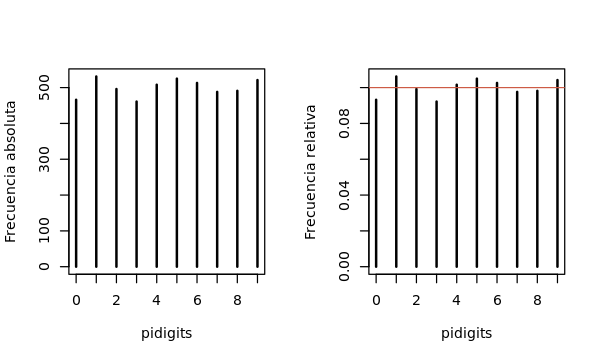

In [9]:
par(mfcol=c(1,2)) #subplots
par(cex=0.7) #control size of labels
plot(tabla, ylab='Frecuencia absoluta')
plot(prop, ylab='Frecuencia relativa')
abline(h = .1, col='coral3')  #se traza una línea con abline en .1

También podemos usar `barplot`:

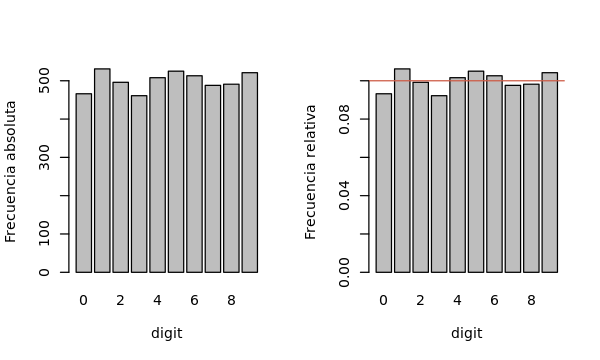

In [10]:
par(mfcol=c(1,2)) #subplots
par(cex=0.7) #control size of labels
barplot(tabla,xlab='digit', ylab='Frecuencia absoluta')
barplot(prop, xlab='digit', ylab='Frecuencia relativa')
abline(h = .1, col='coral3') #se traza una línea con abline en .1

La **respuesta** a la pregunta ¿cómo están distribuidos los dígitos? a partir de la gráfica es clara que están alrededor del valor $.1$ y podríamos concluir que es una distribución uniforme. Estadísticas resumen como la desviación estándar podrían aún más aclararnos esta situación y se verá en la nota de distribuciones comunes que la varianza muestral de una proporción está dada por: $\sqrt{\frac{p(1-p)}{n}}$ con $p$ la proporción de los dígitos. Ésta puede estimarse de los datos con:

In [11]:
desv_est <- sqrt(prop*(1-prop))/dim(pidigits)[1]
desv_est

pidigits
           0            1            2            3            4            5 
5.814250e-05 6.161869e-05 5.978607e-05 5.786161e-05 6.042431e-05 6.131068e-05 
           6            7            8            9 
6.068715e-05 5.935461e-05 5.951698e-05 6.110396e-05 

Y para presentarlos en una forma tabular podemos realizar: $\hat{p} \pm 2\hat{\sigma}$:

In [12]:
options(digits=3) #para sólo imprimir 3 número de dígitos
cbind(prop-2*desv_est, prop, prop+2*desv_est)

,,prop,
0,0.0931,0.0932,0.0933
1,0.1061,0.1062,0.1063
2,0.0991,0.0992,0.0993
3,0.0921,0.0922,0.0923
4,0.1015,0.1016,0.1017
5,0.1049,0.1050,0.1051
6,0.1025,0.1026,0.1027
7,0.0975,0.0976,0.0977
8,0.0981,0.0982,0.0983
9,0.1041,0.1042,0.1043


Con lo que se observa que las proporciones están en el intervalo $(\hat{p}-2\hat{\sigma},\hat{p}+2\hat{\sigma}).$

**Nota:** aunque para este tipo de datos también podríamos realizar gráficas tipo [Pie chart](https://en.wikipedia.org/wiki/Pie_chart) **no se recomiendan** usarlas por problemas de sobrelape y visualización de los porcentajes, por ejemplo: 

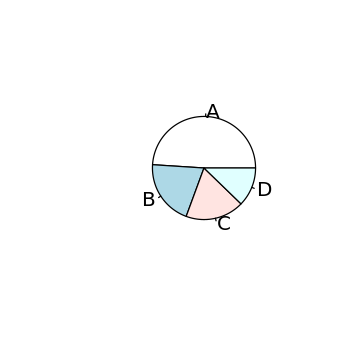

In [13]:
options(repr.plot.width=3, repr.plot.height=3) #esta línea sólo se ejecuta para jupyterlab con R
pie(c(48,20,18,12), labels=c('A','B','C','D'))

Si sólo observamos la gráfica anterior ¿hay diferencia entre 'B' y 'C'? ---> **misterio.** 

### Ejemplo 2

En el ejemplo anterior se utilizó la función de `table`de *R* para calcular el número de conteos en cada clase. Tal función utiliza el tipo *factor*, el cual es útil para representar vectores que contengan datos categóricos. Se utiliza la palabra `factor` para crear tal tipo (aunque hay funciones en `R` que automáticamente crean factores, por ejemplo `read.table` al leer columnas de caracteres):

Considérese el lanzamiento de un dado siete veces que resulta en el vector `resultados`:

In [14]:
resultados=c(1, 4, 3, 5, 4, 2, 4)
valores_posibles = c(1, 2, 3, 4, 5, 6)
etiquetas = c("uno", "dos", "tres", "cuatro", "cinco", "seis")
fy = factor(resultados, levels=valores_posibles, labels=etiquetas)
print(resultados)

[1] 1 4 3 5 4 2 4


Obsérvese que es un tipo de variable categórica nominal. Y al calcular las frecuencias absolutas se obtiene:

In [15]:
table(fy)

fy
   uno    dos   tres cuatro  cinco   seis 
     1      1      1      3      1      0 

no hay resultados para el valor de $6$ por lo que se tiene igual a $0$.

Usaremos la función de `table` para el siguiente ejemplo del famoso dataset con nombre "Weldon's Dice" publicado por el paper de Karl Pearson's en el año 1900 [(referencia)](https://www.tandfonline.com/doi/abs/10.1080/14786440009463897). En ese tiempo, el biólogo inglés Walter F. R. Weldon, usó $12$ dados para generar datos aleatorios, obteniendo la cantidad de $26,306$!!! números aleatorios.

En los resultados, Weldon consideró el número $5$ y $6$ como éxitos en los $12$ dados y los otros números como fracasos. **Si se tiene un dado justo**, la probabilidad de éxito de un sólo dado es $\frac{1}{3}$. El número de éxitos totales en $12$ dados se puede modelar con una **variable aleatoria binomial** con probabilidad de éxito $\frac{1}{3}$.

En *R* se pueden calcular probabilidades de una binomial con la función `dbinom`:

In [16]:
options(digits=3) #para sólo imprimir 3 número de dígitos de p
k = 0:12 #vector que contiene el número de éxitos: 0 éxitos,..., 12 éxitos
n = 12 #número de pruebas
prob = 1/3 #probabilidad de éxito
p = dbinom(k, size=n, prob=prob)
print(p)

 [1] 7.71e-03 4.62e-02 1.27e-01 2.12e-01 2.38e-01 1.91e-01 1.11e-01 4.77e-02
 [9] 1.49e-02 3.31e-03 4.97e-04 4.52e-05 1.88e-06


In [17]:
v_e_12_lanzamientos = round(n*p)
names(v_e_12_lanzamientos) = k
print(v_e_12_lanzamientos)

 0  1  2  3  4  5  6  7  8  9 10 11 12 
 0  1  2  3  3  2  1  1  0  0  0  0  0 


Esto es, en promedio como mínimo en $12$ lanzamientos de $12$ dados tendremos $1$ éxito y como máximo $7$ (éxito es se obtiene o un $5$ o un $6$ en $12$ dados).

En $26,306$ lanzamientos de $12$ dados justos, el número esperado de resultados (outcomes) es (redondeando al entero más próximo):

In [18]:
n_Weldon = 26306
v_e = round(n_Weldon* p)
names(v_e) = k
print(v_e)

   0    1    2    3    4    5    6    7    8    9   10   11   12 
 203 1216 3345 5576 6273 5018 2927 1255  392   87   13    1    0 


Esto es, para $0$ éxitos, el valor esperado es de $203$ lanzamientos: si lanzamos $26,306$ veces los $12$ dados, en promedio $203$ veces obtendremos números distintos a $5$ y a $6$, en proporción o frecuencias relativas equivale a:

In [19]:
203/n_Weldon

[1] 0.00772

y más frecuentemente en $4$ dados en promedio observaremos éxitos:

In [20]:
6273/n_Weldon

[1] 0.238

Asimismo, si lanzamos $26306$ veces los $12$ dados, en promedio en ninguna ocasión en todos los dados tendremos éxito.

El dataset "Weldon's Dice" contiene la siguiente información:

In [21]:
Weldon = c(185, 1149, 3265, 5475, 6114, 5194, 3067,1331, 403, 105, 14, 4, 0)
names(Weldon) = k
print(Weldon)

   0    1    2    3    4    5    6    7    8    9   10   11   12 
 185 1149 3265 5475 6114 5194 3067 1331  403  105   14    4    0 


De los $26,306$ lanzamientos de los $12$ dados, Weldon obtuvo $0$ éxitos en $185$ de éstos, en promedio (en promedio en $185$ lanzamientos en ningún dado salió ni el $5$ ni el $6$).

Una forma de revisar si hay diferencia entre lo observado (lo realizado por Weldon) y lo esperado (lo teórico) es crear una tabla entre los conteos observados en la variable `Weldon` y los conteos esperados en la variable `v_e` y tomar diferencias:

In [22]:
data.frame(v_e, Weldon, Diff=Weldon - v_e)

,v_e,Weldon,Diff
,<dbl>,<dbl>,<dbl>
0,203,185,-18
1,1216,1149,-67
2,3345,3265,-80
3,5576,5475,-101
4,6273,6114,-159
5,5018,5194,176
6,2927,3067,140
7,1255,1331,76
8,392,403,11


Y se puede ver que entre $0$ y $4$ éxitos lo esperado es mayor que lo observado, esto es, para obtener en $26,306$ lanzamientos un número de $3$ éxitos (sacar $5$ o $6$ en los $12$ dados) $5576$ lanzamientos de los $12$ dados se tuvieron que realizar en promedio vs los $5475$ lanzamientos que lo realizó Weldon en promedio.

Una forma visual de comparar los conteos observados de los esperados puede realizarse con dos bar plots de frecuencias de lo observado y lo esperado:

In [23]:
options(repr.plot.width=3.5, repr.plot.height=3.5)#esta línea sólo se ejecuta para jupyterlab con R

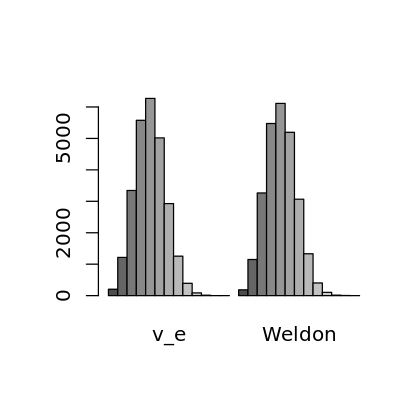

In [24]:
counts = cbind(v_e, Weldon)
barplot(counts, beside=TRUE)

Y visualmente parece que coinciden aproximadamente. También visualmente es mejor y más fácil comparar en el mismo gráfico:

In [25]:
options(repr.plot.width=4, repr.plot.height=4)#esta línea sólo se ejecuta para jupyterlab con R

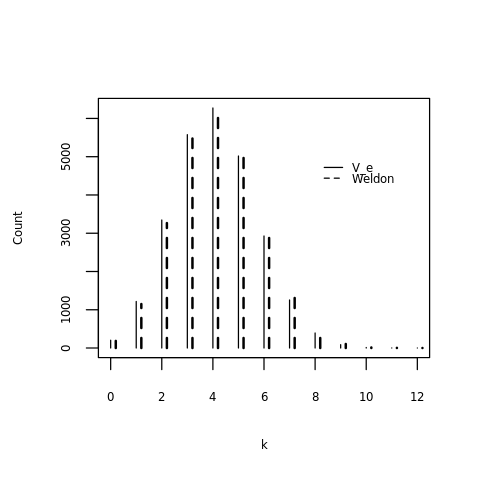

In [26]:
par(ps = 7) #tamaño de texto en ejes y en leyenda
plot(k, v_e, type="h", lwd=1, lty=1, ylab="Count") #type h para líneas
                                                   #lwd para line width
                                                   #ldty para line type
lines(k + .2, Weldon, type="h", lwd=2, lty=2) #lo observado por Weldon
legend(8, 5000, legend=c("V_e", "Weldon"), lty=c(1,2), bty='n')

**Nota:** Aunque visualmente se observan ambas frecuencias muy similares, es necesario usar **inferencia estadística** para probar si los datos son consistentes con el modelo binomial del dado justo. Esto se realiza con una prueba de bondad de ajuste de nombre **ji-cuadrada**. 

# Datos cuantitativos

In [27]:
options(repr.plot.width=4, repr.plot.height=4) #esta línea sólo se ejecuta para jupyterlab con R

## Ejemplo: dataset: mammals de la librería MASS

Este dataset contiene dos variables numéricas: `body` y `brain` y contiene el promedio del peso del cuerpo (kg) y promedio del peso del cerebro (g) de mamíferos respectivamente. El número de mamíferos es de $62$:

In [28]:
library(MASS)
head(mammals)

,body,brain
,<dbl>,<dbl>
Arctic fox,3.38,44.5
Owl monkey,0.48,15.5
Mountain beaver,1.35,8.1
Cow,465.00,423.0
Grey wolf,36.33,119.5
Goat,27.66,115.0


In [29]:
print(dim(mammals))

[1] 62  2


y es un `data.frame`:

In [30]:
is.matrix(mammals)

[1] FALSE

In [31]:
is.data.frame(mammals)

[1] TRUE

se puede convertir un `data frame` a una `matrix` con: `as.matrix` si se desea en el análisis:

In [32]:
head(as.matrix(mammals))

,body,brain
Arctic fox,3.38,44.5
Owl monkey,0.48,15.5
Mountain beaver,1.35,8.1
Cow,465.00,423.0
Grey wolf,36.33,119.5
Goat,27.66,115.0


La función de `summary` calcula $5$ resúmenes de datos y el promedio:

In [33]:
options(digits = 7)#para imprimir 7 número de dígitos en el summary
summary(mammals)

      body              brain        
 Min.   :   0.005   Min.   :   0.14  
 1st Qu.:   0.600   1st Qu.:   4.25  
 Median :   3.342   Median :  17.25  
 Mean   : 198.790   Mean   : 283.13  
 3rd Qu.:  48.203   3rd Qu.: 166.00  
 Max.   :6654.000   Max.   :5712.00  

Obsérvese que los promedios exceden no sólo a las medianas sino también a los cuartiles de tercer orden, lo cual se apreciaría mejor con un `boxplot`. También obsérvese que hay mamíferos que en promedio tienen tamaños de $0.005kg$ y $0.14g$ en cuerpo y cerebro respectivamente vs $6654 kg$ y $5712g$ respectivamente.

### Boxplot

En el `boxplot` se muestran $5$ números ... pero no es posible apreciarlos en las siguientes gráficas... tendremos que transformar nuestros datos y también muestra `outliers` o datos atípicos o extremos graficados como circunferencias:

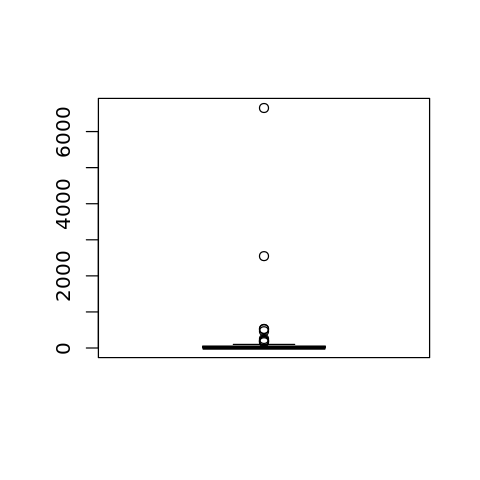

In [34]:
boxplot(mammals$body)

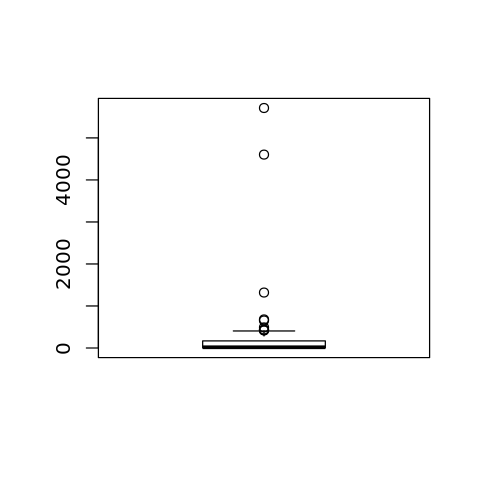

In [35]:
boxplot(mammals$brain)

Obsérvese en el eje vertical que están los datos tienen un mismo rango por lo que podemos colocarlos en un solo `boxplot` (aún estándo una variable en *kg* y otra en *g*):

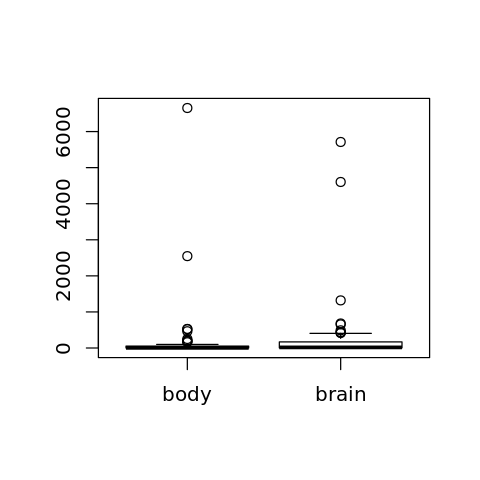

In [36]:
boxplot(mammals)

Al igual que el `summary` de la sección anterior observamos con este `boxplot` que tenemos en el dataset `mammals`, mamíferos con tamaños muy grandes de cuerpo y cerebro (en promedio).

**Nota:** Los datos atípicos o extremos pueden ser datos erróneos o pueden ser datos que son correctos pero se alejan del patrón general. Es muy importante su tratamiento pues nos dan información sobre el correcto funcionamiento de los métodos estadísticos, la recolección de los datos o del objeto de estudio: aquél fenómeno(s) que produjo(eron) los datos.

### Scatterplot

Para un `data.frame` como el de `mammals` con dos variables numéricas al hacer `plot` se obtiene un `scatterplot`

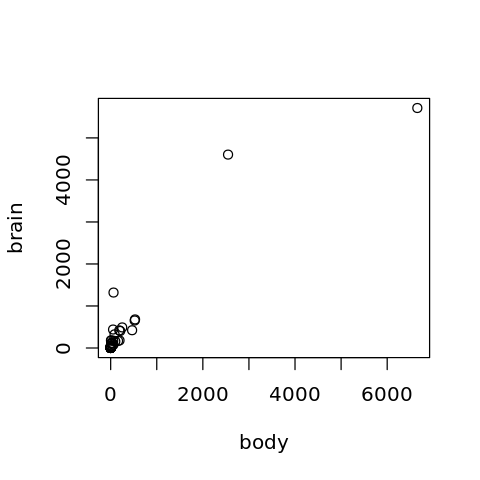

In [37]:
plot(mammals)

## Transformando el dataset

Como ya observamos en el `scatterplot` y `boxplot` anteriores tenemos mediciones de mamíferos que no permiten visualizar bien los datos por datos extremos. Para arreglar esto, es mejor realizar una transformación de logaritmo para apreciar mejor los datos:

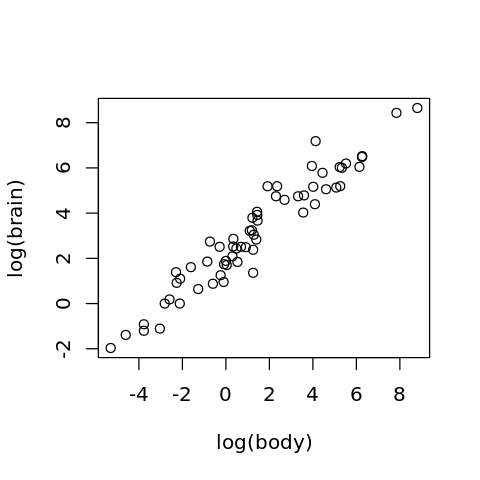

In [38]:
plot(log(mammals$body),  #se aplica logaritmo a todo un vector
     log(mammals$brain), #se aplica logaritmo a todo un vector
     xlab="log(body)", ylab="log(brain)")

Si se aplica la transformación de logaritmo a todo el dataset se obtiene un `data frame` de dos variables numéricas:

In [39]:
log_mammals <- log(mammals)
colnames(log_mammals) <- c('log_body', 'log_brain')
head(log_mammals)

,log_body,log_brain
,<dbl>,<dbl>
Arctic fox,1.2193539,3.795489
Owl monkey,-0.7339692,2.740840
Mountain beaver,0.3001046,2.091864
Cow,6.1420374,6.047372
Grey wolf,3.5926438,4.783316
Goat,3.3199873,4.744932


y al realizar el `summary` con tal transformación se obtienen datos menos "extremos":

In [40]:
summary(log_mammals)

    log_body         log_brain     
 Min.   :-5.2983   Min.   :-1.966  
 1st Qu.:-0.5203   1st Qu.: 1.442  
 Median : 1.2066   Median : 2.848  
 Mean   : 1.3375   Mean   : 3.140  
 3rd Qu.: 3.8639   3rd Qu.: 5.111  
 Max.   : 8.8030   Max.   : 8.650  

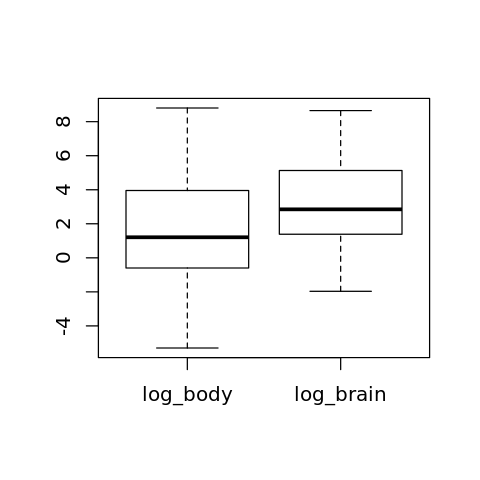

In [41]:
boxplot(log_mammals)

**Obs:**

* En un `boxplot` se muestran $5$ números: mediana (recta gruesa horizontal en cada caja), primer y tercer cuartil (que delimitan a las cajas). 

* La línea punteada superior llega hasta el tercer cuartil más $1.5$ veces el tamaño de la caja o hasta el valor máximo (no outlier), la línea punteada inferior llega hasta el valor mínimo de los datos (no outlier) o hasta el primer cuartil menos $1.5$ veces el tamaño de la caja. 

* Los *outliers* se muestran con circunferencias y están más allá de las líneas punteadas(en este caso no tenemos outliers para la transformación realizada). 

* La mediana puede estar más cerca al valor del primer o tercer cuartil si hay sesgo en la distribución de los datos (de hecho en la dirección opuesta al sesgo es donde se encontrará la mediana).

**Comentario:** ver por ejemplo la ayuda de la función `fivenum`: `?fivenum` para los $5$ números de Tukey.

Los `outliers` se pueden obtener con:

In [42]:
print((boxplot.stats(mammals$body)$out))

 [1]  465.0 2547.0  187.1  521.0  529.0  207.0 6654.0  250.0  192.0  160.0


In [43]:
print((boxplot.stats(mammals$brain)$out))

[1]  423 4603  419  655  680 1320 5712  490  440


### Boxplot y scatterplot con ggplot2

A continuación, a manera de ejemplo de uso del paquete `ggplot2` para gráficas se colocan los datos `log_mammals` en un formato adecuado ("long format"):

In [44]:
df_mammals_body <- data.frame(medida = rep('body', times=nrow(mammals)),
                         mammal=rownames(log_mammals),
                         valor = log_mammals$log_body)

In [45]:
head(df_mammals_body)

medida,mammal,valor
<fct>,<fct>,<dbl>
body,Arctic fox,1.2193539
body,Owl monkey,-0.7339692
body,Mountain beaver,0.3001046
body,Cow,6.1420374
body,Grey wolf,3.5926438
body,Goat,3.3199873


In [46]:
df_mammals_brain <- data.frame(medida = rep('brain', times=nrow(mammals)),
                         mammal=rownames(log_mammals),
                         valor = log_mammals$log_brain)

In [47]:
head(df_mammals_brain)

medida,mammal,valor
<fct>,<fct>,<dbl>
brain,Arctic fox,3.795489
brain,Owl monkey,2.740840
brain,Mountain beaver,2.091864
brain,Cow,6.047372
brain,Grey wolf,4.783316
brain,Goat,4.744932


In [48]:
df_mammals_gg<-rbind(df_mammals_body, df_mammals_brain)

In [49]:
head(df_mammals_gg)

medida,mammal,valor
<fct>,<fct>,<dbl>
body,Arctic fox,1.2193539
body,Owl monkey,-0.7339692
body,Mountain beaver,0.3001046
body,Cow,6.1420374
body,Grey wolf,3.5926438
body,Goat,3.3199873


In [50]:
tail(df_mammals_gg)

,medida,mammal,valor
,<fct>,<fct>,<dbl>
119,brain,Echidna,3.2188758
120,brain,Brazilian tapir,5.1298987
121,brain,Tenrec,0.9555114
122,brain,Phalanger,2.4336134
123,brain,Tree shrew,0.9162907
124,brain,Red fox,3.9199912


In [51]:
print(dim(df_mammals_gg))

[1] 124   3


In [52]:
gf <- ggplot(data=df_mammals_gg)  ##objeto de ggplot

### Boxplot con ggplot2

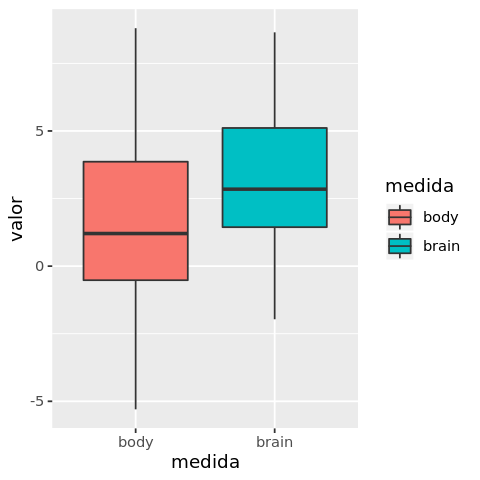

In [53]:
gf + geom_boxplot(aes(x=medida, y=valor, fill = medida))

### Scatterplot con ggplot2

Los logaritmos del tamaño del cuerpo y del tamaño del cerebro están correlacionados positivamente:

In [54]:
options(digits=3)#para sólo imprimir 3 número de dígitos
cor(log_mammals)

,log_body,log_brain
log_body,1.00,0.96
log_brain,0.96,1.00


Por lo que se puede añadir una recta por regresión lineal:

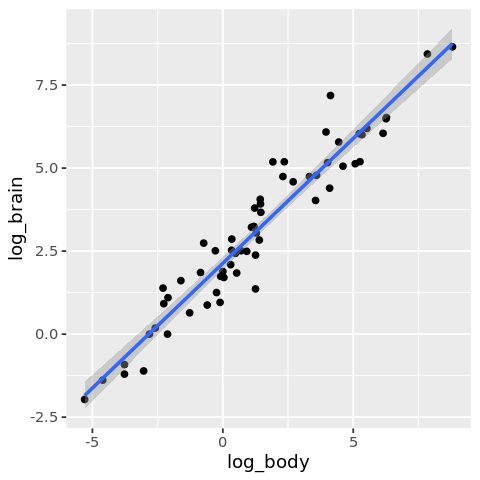

In [55]:
ggplot(log_mammals)+geom_point(aes(x=log_body, y=log_brain)) +
geom_smooth(aes(x=log_body, y=log_brain),method="lm")

### Stripchart o dotplot

La función `stripchart` realiza la gráfica a lo largo de una línea horizontal de la variable dada y también se puede colocar una fórmula en la que se especifiquen grupos. Se recomienda este tipo de gráficas para una cantidad moderada de datos (no muy grande). Ver ejemplo siguiente:

##### en mammals ...

Podemos añadir una nueva variable que sea categórica y represente el tamaño de los mamíferos: `grandes` y `chicos`. Un mamífero lo categorizamos como `grande` si el peso de su cuerpo está por encima de la mediana (para los datos transformados con `log`). Una variable `size` puede añadirse al `data.frame` para indicar lo anterior:

In [56]:
m = median(log_mammals$log_body)
log_mammals$size = ifelse(log_mammals$log_body >= m, "grande", "pequenio")

In [57]:
head(log_mammals)

,log_body,log_brain,size
,<dbl>,<dbl>,<chr>
Arctic fox,1.219,3.80,grande
Owl monkey,-0.734,2.74,pequenio
Mountain beaver,0.300,2.09,pequenio
Cow,6.142,6.05,grande
Grey wolf,3.593,4.78,grande
Goat,3.320,4.74,grande


y observar la distribución de los puntos con `stripchart` de acuerdo a cada tamaño del mamífero:

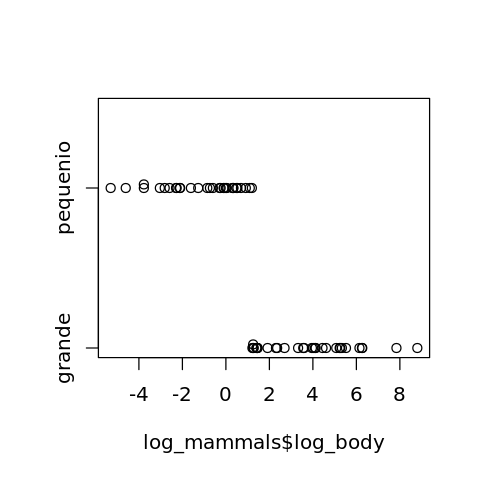

In [58]:
stripchart(log_mammals$log_body~log_mammals$size,
          method="stack", pch=1, cex=1) #stack grafica los puntos encima de
                                        #unos de otros con mismo valor
                                        #se recomienda para valores discretos
                                        #con muchos empates

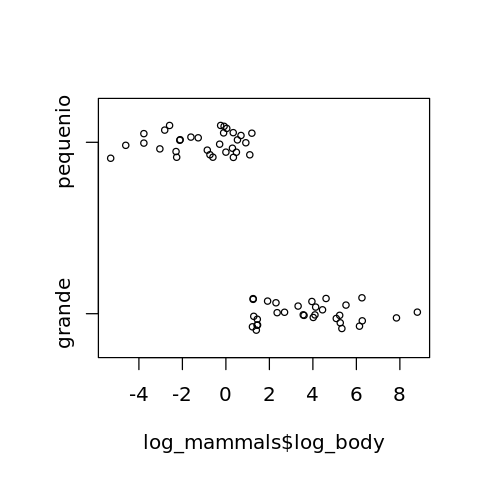

In [59]:
stripchart(log_mammals$log_body~log_mammals$size,
          method="jitter",
          jitter=.1,
          pch=1,
          cex=.7) #con el método jitter
                  #añadimos algo de ruido en el eje vertical
                  #para separar valores que empatan aunque para
                  #este ejemplo que tiene datos en un continuo
                  #son pocos los valores iguales

### Stripchart o dotplot con ggplot2

Creamos la variable `size` para añadirla al formato `largo` de datos.

In [60]:
df_mammals_body$size = ifelse(df_mammals_body$valor >= m, "grande", "pequenio")
df_mammals_brain$size = df_mammals_body$size

In [61]:
head(df_mammals_brain$size)

[1] "grande"   "pequenio" "pequenio" "grande"   "grande"   "grande"

In [62]:
head(df_mammals_gg)

medida,mammal,valor
<fct>,<fct>,<dbl>
body,Arctic fox,1.219
body,Owl monkey,-0.734
body,Mountain beaver,0.300
body,Cow,6.142
body,Grey wolf,3.593
body,Goat,3.320


In [63]:
df_mammals_gg$size <-c(df_mammals_body$size, df_mammals_body$size)

In [64]:
head(df_mammals_gg)

medida,mammal,valor,size
<fct>,<fct>,<dbl>,<chr>
body,Arctic fox,1.219,grande
body,Owl monkey,-0.734,pequenio
body,Mountain beaver,0.300,pequenio
body,Cow,6.142,grande
body,Grey wolf,3.593,grande
body,Goat,3.320,grande


Volvemos a crear el objeto de `ggplot2`:

In [65]:
gf <- ggplot(data=df_mammals_gg)

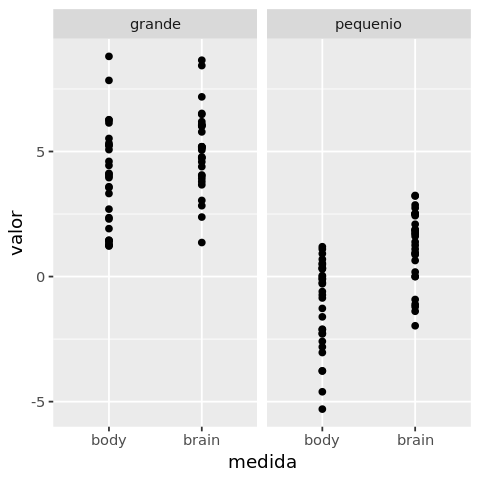

In [66]:
gf + geom_point(aes(x=medida,y=valor))+
facet_wrap(~size)

Entonces mamíferos con cuerpo pesado (ligero) en kg tienen cerebro pesado (ligero) en g.

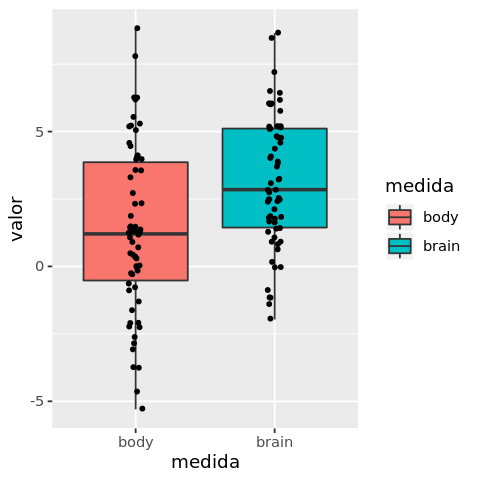

In [67]:
gf + geom_boxplot(aes(x=medida, y=valor, fill = medida)) + 
geom_jitter(aes(x=medida,y=valor),position=position_jitter(width=0.05,height=0.05),size=1)

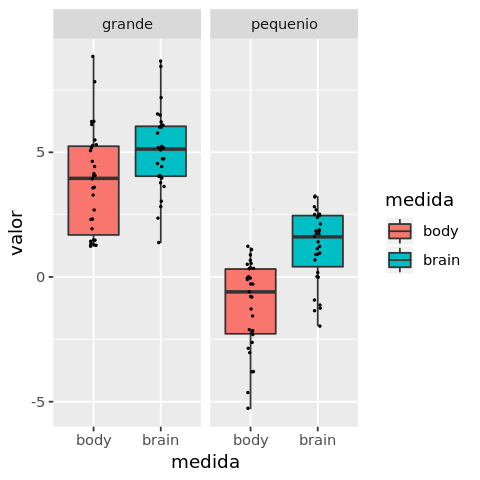

In [68]:
gf + geom_boxplot(aes(x=medida, y=valor, fill = medida)) + 
#geom_point(aes(x=medida,y=valor))
geom_jitter(aes(x=medida,y=valor),position=position_jitter(height=0.05,width=0.05), size=.3) +
facet_wrap(~size)

### Histogramas

Aunque la `barplot` y el histograma se ven similares, la `barplot` es usada para **datos cualitativos o categóricos** y el **histograma para datos numéricos o cuantitativos**. No obstante, los `bins` o anchos de los intervalos que se utilizan en un histograma son en esencia categorías. 

A manera de ejemplo, a continuación se muestra cómo se pueden construir intervalos y contar cuántos datos caen en cada uno y luego se le pasa a la función de `hist` con el argumento `breaks`.

In [69]:
#los siguientes valores de dif y width fueron elegidos de acuerdo al summary 
#anterior usando los datos en escala logarítmica.
#La idea es que se cubran todas las mediciones de log_body y log_brain
#en el rango en el que se encuentran.

#Para log_body:
dif <- 0.5
width <- 1.5
minimo <- min(log_mammals$log_body) - dif
maximo <- max(log_mammals$log_body) + dif
cortes_body <- seq(minimo, maximo, by = width)
log_mammals$intervalo_body <- cut(log_mammals$log_body, breaks = cortes_body)

#Para log_brain:
dif <- 1
minimo <- min(log_mammals$log_brain) - dif
maximo <- max(log_mammals$log_body) + dif
cortes_brain <- seq(minimo, maximo, by = width)
log_mammals$intervalo_brain <- cut(log_mammals$log_brain, breaks = cortes_brain)
head(log_mammals)

,log_body,log_brain,size,intervalo_body,intervalo_brain
,<dbl>,<dbl>,<chr>,<fct>,<fct>
Arctic fox,1.219,3.80,grande,"(0.202,1.7]","(3.03,4.53]"
Owl monkey,-0.734,2.74,pequenio,"(-1.3,0.202]","(1.53,3.03]"
Mountain beaver,0.300,2.09,pequenio,"(0.202,1.7]","(1.53,3.03]"
Cow,6.142,6.05,grande,"(4.7,6.2]","(6.03,7.53]"
Grey wolf,3.593,4.78,grande,"(3.2,4.7]","(4.53,6.03]"
Goat,3.320,4.74,grande,"(3.2,4.7]","(4.53,6.03]"


Para las frecuencias en cada intervalo (intervalos de la forma "( ]") podemos usar `table` y `prop.table`:

In [70]:
table(log_mammals$intervalo_body)


 (-5.8,-4.3]  (-4.3,-2.8]  (-2.8,-1.3] (-1.3,0.202]  (0.202,1.7]    (1.7,3.2] 
           2            4            6           10           17            4 
   (3.2,4.7]    (4.7,6.2]    (6.2,7.7]    (7.7,9.2] 
           9            6            2            2 

In [71]:
table(log_mammals$intervalo_brain)


 (-2.97,-1.47] (-1.47,0.0339]  (0.0339,1.53]    (1.53,3.03]    (3.03,4.53] 
             1              6              9             16              9 
   (4.53,6.03]    (6.03,7.53]    (7.53,9.03] 
            12              7              2 

In [72]:
options(digits = 2) #para sólo imprimir 2 número de dígitos
prop.table(table(log_mammals$intervalo_body))


 (-5.8,-4.3]  (-4.3,-2.8]  (-2.8,-1.3] (-1.3,0.202]  (0.202,1.7]    (1.7,3.2] 
       0.032        0.065        0.097        0.161        0.274        0.065 
   (3.2,4.7]    (4.7,6.2]    (6.2,7.7]    (7.7,9.2] 
       0.145        0.097        0.032        0.032 

In [73]:
prop.table(table(log_mammals$intervalo_brain))


 (-2.97,-1.47] (-1.47,0.0339]  (0.0339,1.53]    (1.53,3.03]    (3.03,4.53] 
         0.016          0.097          0.145          0.258          0.145 
   (4.53,6.03]    (6.03,7.53]    (7.53,9.03] 
         0.194          0.113          0.032 

Histograma con los cortes anteriores:

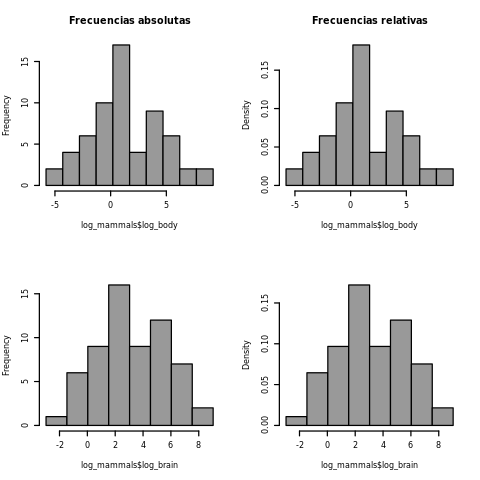

In [74]:
par(mfrow=c(2,2)) #subplots
par(cex=0.4) #control size of labels
hist(log_mammals$log_body, breaks=cortes_body, 
     main="Frecuencias absolutas", col='gray60') #conteos
hist(log_mammals$log_body, breaks=cortes_body, 
     main="Frecuencias relativas", col='gray60',prob=T)#frecuencias entre 0 y 1 (relativas)
hist(log_mammals$log_brain, breaks=cortes_brain, 
     main="", col='gray60')
hist(log_mammals$log_brain, breaks=cortes_brain, 
     main="", col='gray60',prob=T)

Histograma con los `breaks` que se calculan en la función `hist`:

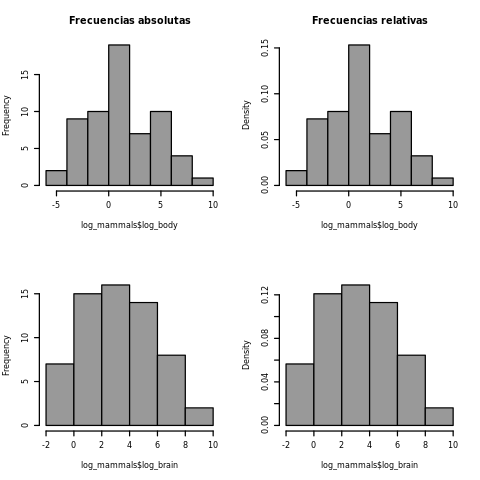

In [75]:
par(mfrow=c(2,2)) #subplots
par(cex=0.4) #control size of labels
hist(log_mammals$log_body, 
     main="Frecuencias absolutas", col='gray60')
hist(log_mammals$log_body, 
     main="Frecuencias relativas", col='gray60',prob=T)
hist(log_mammals$log_brain, 
     main="", col='gray60')
hist(log_mammals$log_brain, 
     main="", col='gray60',prob=T)

**Obs:** 

* Obsérvese que los histogramas creados con la función `hist` son por default histogramas de conteos y los histogramas cambian de acuerdo a los `breaks` o *binwidths* elegidos.

* Las barras de los histogramas anteriores del lado derecho se obtienen de los conteos o tabla de frecuencias y están escaladas según la frecuencia relativa en el ancho del intervalo de clase correspondiente.

* En los histogramas buscamos alrededor de qué valores se agrupan los datos, dispersión y forma (simetría, sesgo, colas largas o cortas), subgrupos o datos atípicos.

* Como se observó, al variar el número de `breaks` o `binwidth` los histogramas cambian (asimismo si se eligen construir con intervalos de la forma "(]" o "[)" por lo que una pregunta natural es ¿cuál debe ser el ancho del intervalo? la respuesta no es simple pues cada histograma que se realiza depende de los datos que se están analizando. Lo mejor es ir modificando los anchos o los `breaks` (experimentando). Los histogramas no deben tener anchos de intervalos demasiado angostos ni demasiado anchos, se debe tener un balance entre estas medidas.

### Histograma con ggplot2

A manera de ejemplo de uso del paquete de `ggplot2` para graficar histogramas, usamos el objeto `gf` creado anteriormente con la función `ggplot` y le colocamos la capa de `geom_histogram`.

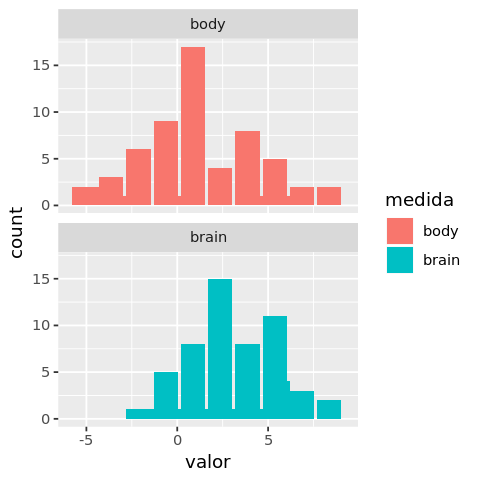

In [76]:
#usamos los breaks creados anteriormente
gf+ geom_histogram(aes(x=valor,
                       fill = medida),
                   breaks=c(cortes_body, cortes_brain)) +
facet_wrap(~medida, nrow=2) #gráfica en 2 páneles

Para representar la frecuencia entre $0$ y $1$:

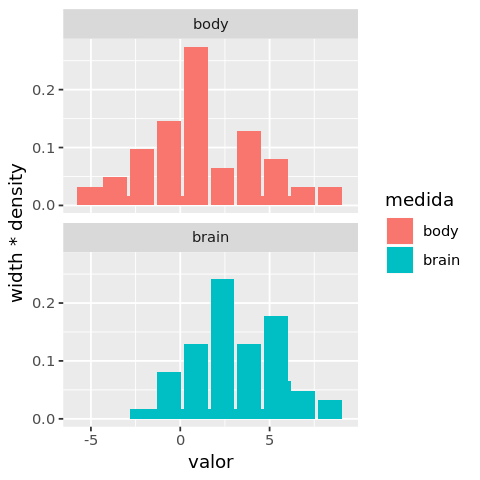

In [77]:
#la variable width fue creada antes para generar
#los breaks en el mismo bloque de código
gf+ geom_histogram(aes(x=valor,
                       fill = medida,
                       y=width*..density..),
                   breaks=c(cortes_body, cortes_brain)) +
facet_wrap(~medida,nrow=2)

# Propiedades de distribuciones de datos

Una vez realizada la visualización de los datos lo siguiente es identificar algunas propiedades presentes en la misma. Entre las propiedades que deben como mínimo identificarse están:

* Centro: ¿a lo largo de qué valor(es) se encuentran centrados mis datos? revisamos la tendencia de los datos a estar concentrados en cierto(s) valor(es).

* Dispersión: ¿qué tanta dispersión se encuentran en mis datos? lo cual está íntimamente relacionado con ¿qué variabilidad existe en mis datos?, ¿cómo es la variabilidad?, ¿cómo describir a la variabilidad? ... estos son parte de los objetivos principales de la Estadística. Los datasets que tienen gran dispersión en una variable tienden a cubrir un intervalo grande, los que tienen menos dispersión en una variable tienden a agruparse alrededor de un valor central.

* Forma: simetría, colas delgadas o gruesas (pesadas), un(os) valor(es) que se repite(n) constantemente o no... estas características típicamente se relacionan con una herramienta visual como un `barplot` o un histograma. La forma nos ayuda a describir la estructura de los datos y a elegir la herramienta de análisis. Entre las formas típicas que encontramos están:

<p align="centered">
<img src="https://drive.google.com/uc?export=view&id=1cjPXIV_DD4pg9plUSW4Le1fAln3ud7Rz" heigth="500" width="500">
</p>

La gráfica anterior fue copiada directamente del libro M.D. Ugarte, A. F. Militino, A. T. Arnholt, Probability and Statistics with R", 2ed. capítulo 2 en donde se muestran formas comunes de distribuciones.

* Todas son simétricas con excepción de la número $2$ y $8$ que se caracterizan por ser **sesgadas a la derecha y a la izquierda respectivamente**.

* Todas son **unimodales** con excepción de la $1$, $4$ y $9$ las cuales cumplen con ser **bimodal, uniforme y multimodal respectivamente**. 

* De las **simétricas** es conveniente distinguir las que tienen **colas cortas o largas o normales**. Ejemplos se obsevan en la $3, 5$ y $7$. La $4$ y la $6$ además de ser simétricas, también son de cola corta.

También la **curtosis** se utiliza para revisar la forma de la distribución de los datos. Dependiendo de lo "picuda" y el tipo de colas que tiene la distribución es el nombre que adquiere. **Platicúrtica** menos picuda y con colas más delgadas que la distribución normal ($5$ anterior) y como ejemplo está el número $4$ anterior; **leptocúrtica** más picuda y colas más gruesas (colas pesadas) que la distribución normal; **mesocúrtica** similar a la distribución normal: un pico redondeado y colas moderadas. Como ejemplo de una distribución leptocúrtica se encuentra la distribución logística:

In [78]:
set.seed(2000)
n <- 50
df <- data.frame(x=rlogis(n))
y <- dlogis(df$x)
df$y <- y

In [79]:
gf <-ggplot(data = df, aes(x=x, y=y)) + geom_point(size=.01) + ggtitle('rlogis') +
theme(plot.title = element_text(size=10, hjust = 0.5))

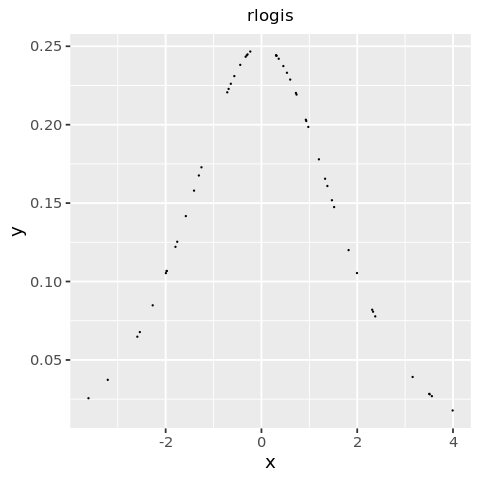

In [80]:
gf

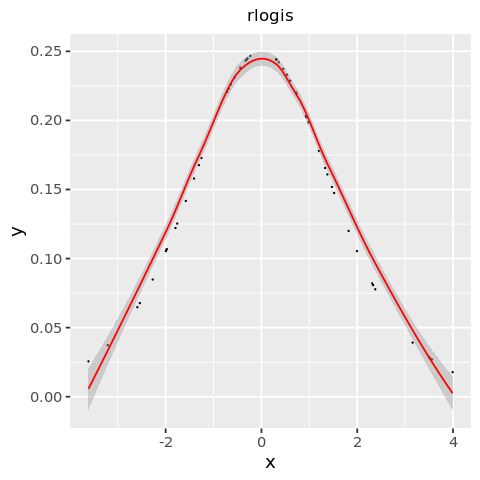

In [81]:
gf + geom_smooth(method='loess', colour='red', size=.5) #lowess: locally weighted
                                                        #regression

# Estadísticas descriptivas

Utilizamos además de la herramienta de visualización, resúmenes numéricos que nos ayuden a caracterizar la distribución de los datos. Entre las estadísticas descriptivas más comunes se encuentran:

## Medidas de tendencia central

¿Alrededor de cuál(es) valor(es) se localiza o centra la distribución de los datos?

### Media o promedio

La media **muestral** de variables $x_1, x_2, \dots, x_n$ se denota como: $\bar{x}$ y está definida: $$\bar{x} = \frac{1}{n} \displaystyle \sum_{i=1}^n x_i.$$

**Ejemplo:** 

1) para el conjunto de valores $\{8,7,10,8,9,7\}$ se tiene:

In [82]:
vec<-c(8,7,10,8,9,7)
promedio<-mean(vec)
round(promedio,2)

[1] 8.2

2) para el conjunto de valores $\{8,7,10,8,9,700\}$ se tiene:

In [83]:
vec<-c(8,7,10,8,9,700)
promedio<-mean(vec)
round(promedio,2)

[1] 124

**Obs:** 

* Obsérvese que la media de datos es muy sensible a valores extremos o atípicos aunque la media se calcula muy fácilmente. 

* Para grandes poblaciones de datos numéricos, es común utilizar a la media para representar a la población.


* Dada una población típicamente la media poblacional o media real es desconocida por lo que se tiene que inferir mediante las medias de una o varias muestras de la población. A la media de la población total o media real se denota como $\mu$. Si tenemos un gran número de muestras, el valor esperado de sus medias es una buena aproximación de la media de la población. En este caso decimos que $\bar{x}$ (media muestral) es un **estimador sin sesgo** de $\mu$ (media poblacional).

### Medias recortadas

Está diseñada para aliviar la sensibilidad de la media a valores extremos. La idea es cortar una fracción (menos de $.5$) las observaciones en los extremos de una lista ordenada y calcular la media muestral resultado del corte. Un ejemplo de esto son las medias de las evaluaciones de los jueces en eventos deportivos: se elimina la calificación más alta y la más baja y se toma el promedio de las restantes como representativo.

**Ejemplo:**

1) para el conjunto de valores $\{8,7,10,8,9,7\}$ se tiene:

In [84]:
vec<-c(8,7,10,8,9,7)
promedio_recortado<-mean(vec, trim=1/6)
round(promedio_recortado,2)

[1] 8

2) para el conjunto de valores $\{8,7,10,8,9,700\}$ se tiene:

In [85]:
vec<-c(8,7,10,8,9,700)
promedio_recortado<-mean(vec, trim=1/6)
round(promedio_recortado,2)

[1] 8.8

**Obs:** es resistente a valores extremos y comparte con la media propiedades matemáticas interesantes, sin embargo, se requiere ordenar a los datos.

### Mediana

La mediana es el valor que parte al conjunto de datos ordenados en dos. Para encontrar la mediana, los datos se ordenan de menor a mayor y,

* si el número de datos es impar, la mediana es el valor que se encuentra a la mitad del conjunto,

* si el número de datos es par, la mediana es el promedio de los dos datos intermedios.

**Ejemplo:**

1) Para el conjunto de valores $\{8,7,10,8,9,7\}$ se tiene:

In [86]:
vec<-c(8,7,10,8,9,7)
mediana<-median(vec)
round(mediana,2)

[1] 8

2) Para el conjunto de valores $\{8,7,10,8,9,700\}$ se tiene:

In [87]:
vec<-c(8,7,10,8,9,700)
mediana<-median(vec)
round(mediana,2)

[1] 8.5

3) Para el conjunto de valores $\{1,3,8,15,5,9,2,1,4\}$ se tiene:

In [88]:
vec <- c(1,3,8,15,5,9,2,1,4)
mediana<-median(vec)
round(median(vec),2)

[1] 4

**Obs:** 

* Obsérvese que la mediana es resistente a datos extremos o atípicos pero para su cálculo se requiere ordenar los datos.

* Si la media es igual a la mediana se dice que la distribución es **simétrica**. Si la media es mayor a la mediana, decimos que hay **sesgo a la derecha**, y si la media es menor a la mediana, entonces decimos que hay **sesgo a la izquierda**.

**Nota:** la mediana es resistente a los datos extremos, sin embargo no utiliza todos los datos (piénsese en que se debe calcular un promedio para el caso impar). En una primer exploración de los datos se recomienda utilizar la mediana. Tradicionalmente la media es más ocupada que la mediana y la mediana más que las medias recortadas; además, la media se utiliza típicamente en la inferencia estadística por lo que si se va a utilizar se debe verificar la presencia de *outliers* en los datos.

### Moda

La media y la mediana no toman en cuenta la repetición de los datos, se define para este efecto, la moda. Ésta es simplemente el **valor o categoría** que ocurre con mayor frecuencia en un conjunto de datos. Es claro que puede haber más de una moda ya que puede haber más de un dato que se repita con la misma frecuencia. Para el caso de dos modas, decimos que la distribución de los datos es **bimodal**. Cuando existen más de dos modas, la distribución se denomina **multimodal**.


**Ejemplo:**

1) Para el conjunto de valores $\{100,55,60,100,70,100,55,60\}$ se tiene:

In [89]:
vec <- c(100,55,60,100,70,100,55,60)
table(vec)

vec
 55  60  70 100 
  2   2   1   3 

por lo que la moda es $100$.

2) Para el conjunto de valores $\{100,55,60,100,70,55\}$ se tiene: 

In [90]:
vec <- c(100,55,60,100,70,55)
table(vec)

vec
 55  60  70 100 
  2   1   1   2 

es bimodal con modas de 55 y 100.

3)Para el conjunto {coche, canicas, trompo, pelota, coche, pelota, yoyo, pelota} se tiene:

In [91]:
vec<-c('coche', 'canicas', 'trompo', 'pelota', 'coche',
       'pelota', 'yoyo', 'pelota')
table(vec)

vec
canicas   coche  pelota  trompo    yoyo 
      1       2       3       1       1 

la moda es pelota.

**Obs:** 

* Visualmente una moda se puede localizar en un histograma o en un `barplot` pues es un **máximo local** del histograma o la(s) barra(s) más grande en un `barplot`.

* Si la distribución de datos es unimodal y aproximadamente simétrica, la moda se interpreta fácilmente pues es una medida de tendencia central.

## Medidas de dispersión

### Varianza muestral y desviación estándar muestral

La varianza muestral denotada como $S^2$ para variables $x_1, x_2, \dots, x_n$ se calcula con la fórmula: $$ S^2 = \frac{1}{n-1}\displaystyle \sum_{i=1}^n(x_i - \bar{x})^2$$

La desviación estándar muestral es: $S = \sqrt{S^2}$ y se utiliza para reportar la dispersión en las mismas unidades que los datos.

1) para el conjunto de valores $\{8,7,10,8,9,7\}$ se tiene:

In [92]:
vec<-c(8,7,10,8,9,7)
varianza<-var(vec)
desv_est<-sd(vec)
round(varianza,2)
round(desv_est,2)

[1] 1.4

[1] 1.2

2) para el conjunto de valores $\{8,7,10,8,9,700\}$ se tiene:

In [94]:
vec<-c(8,7,10,8,9,700)
varianza<-var(vec)
desv_est<-sd(vec)
round(varianza,2)
round(desv_est,2)

[1] 79719

[1] 282

**Obs:**

* Es sensible a los datos extremos o atípicos.

* Si se calcula la varianza muestral de datos de una variable aleatoria $X$ entonces $S^2$ es un estimador de la varianza poblacional de $X$: $\sigma_{X}$.

* Una interpretación para la desviación estándar se da utilizando las siguientes reglas:

a) Regla de Chebychev: la proporción de observaciones dentro de $k$ desviaciones estándar de la media es al menos $1-\frac{1}{k^2}$, esto es, al menos $75\%, 89\%$ y $94\%$ de los datos están dentro de $2,3$ y $4$ desviaciones estándar de la media, respectivamente.

**Nota:** esta regla de Chebychev aplica para cualquier distribución, cualquier lista de números no importando de dónde provienen o de qué histograma, sin embargo hay casos en los que no nos dice mucho tal regla. Por ejemplo, si $k$ es cercano a $1$ entonces $1-\frac{1}{k^2}$ es cercano a $0$ y tendríamos que al menos $0\%$ de observaciones aproximadamente están dentro de una desviación estándar de la media (lo cual no dice mucho...).

b) Regla empírica: si los datos siguen una curva de campana, entonces aproximadamente $68\%, 95\%$ y $99.7\%$ de los datos se encuentran dentro de $1, 2$ y $3$ desviaciones estándar de la media, respectivamente.


### Rango intercuartílico o amplitud

Los cuartiles son resistentes a datos extremos o atípicos y una medida de dispersión asociada con ellos es el rango intercuartílico definido como: $IQR = q_{0.75} - q_{0.25}$ (el cual aparece en una `boxplot`).

**Obs:** es resistente a outliers y no normalidad pero requiere se haga un ordenamiento de los datos y sólo involucra el $50\%$ de los mismos.

1) para el conjunto de valores $\{8,7,10,8,9,7\}$ se tiene:

In [95]:
vec<-c(8,7,10,8,9,7)
rango_iq<-IQR(vec)
round(rango_iq,2)


[1] 1.5

2) para el conjunto de valores $\{8,7,10,8,9,700\}$ se tiene:

In [96]:
vec<-c(8,7,10,8,9,700)
rango_iq<-IQR(vec)
round(rango_iq,2)

[1] 1.8

**Obs:** 

* Si el conjunto de datos es  aproximadamente normal se sugieren usar la media y la desviación estándar. Si se tiene un conjunto de datos con una forma inusual, sesgada o con valores extremos o atípicos se sugiere la mediana y el $IQR$.

* El $IQR$ y la desviación estándar, $S$, no están midiendo la misma cantidad en promedio pues se puede verificar que si la distribución de los datos es similar a una campana entonces en promedio $S$ es aproximadamente $\sigma$ pero el $IQR$ es más grande que $S$.

## Correlación

En presencia de datos en los que se han medido dos variables, el coeficiente de correlación de Pearson muestral mide la asociación lineal entre tales variables y se define como: $$r_{x,y}=\frac{\displaystyle \sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\displaystyle \sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}}.$$

**Obs:**

* $-1 < r_{x,y} < 1$. Valores cercanos a $-1$ o a $1$ indican relación lineal fuerte, $0$ indica no correlación entre $x$ y $y$.

* Es independiente de la escala en la que están medidas las variables, esto es, se obtiene el mismo valor de correlación si se realizan transformaciones lineales a los datos: $r_{x,y}=r_{ax+b,cy+d}$ con $a,c$ constantes positivas y $b,d$ constantes.

Por ejemplo:

In [97]:
x<-c(1,3,4,-1,2)
y<-c(0,-1,3,-7,4)
cor(x,y)

[1] 0.78

In [98]:
a=3;c=2; b=-1;d=5
cor(a*x+b,c*y+d)

[1] 0.78

## Cuantiles

**Nota:** Dados un conjunto finito de datos representados como $x_1, x_2, \dots, x_n$ si se ordenan en una secuencia creciente de la forma: $$x_{(1)} \leq x_{(2)} \leq \dots, x_{(n)}$$ se obtienen las llamadas **estadísticas de orden:**. El valor $x_{(k)}$ cumple que aproximadamente $100\frac{k}{n}\%$ de valores se encuentran por debajo de $x_{(k)}$. Las estadísticas de orden dan información sobre la forma de distribución de los datos pues dan una idea de alrededor de cuáles valores los datos se encuentran concentrados y dónde son escasos.

Los cuantiles están relacionados con las estadísticas de orden sin embargo, no hay una definición universal de los mismos, por ejemplo:

* Considerándose que los datos son ordenados de menor a mayor (estadísticas de orden), un cuantil de orden $p$, denotado como $q_p$ marca un corte en los datos de modo que una proporción $p$ de valores de los datos son menores o iguales a $q_p$. Por ejemplo, para el cuantil de orden $p=0.36$ se tiene un $36\%$ aproximadamente de cantidad de valores debajo o iguales al valor $q_{.36}$. Otro ejemplo, si los datos son $\{3,4,4,5\}$ entonces el $3$ es el cuantil $\frac{1}{4}$ ($q_{.25}=3$), el $4$ es el cuantil $\frac{2}{4}$ ($q_{.5}=4$), también $4$ es el cuantil $\frac{3}{4}$ ($q_{.5}=4$) y el $5$ es el cuantil $1$ ($q_{1}=5$). El problema con esta definición es que hay distribuciones de datos que no tienen cuantil $0$ ni cuantil $1$ (para un cuantil $0$ piénsese en $n$ grande, entonces $\frac{1}{n} \rightarrow 0$ y análogamente para el cuantil $1$ sería $1-\frac{1}{n}$ que tiende a $1$), por ejemplo para la distribución normal se tiene: 


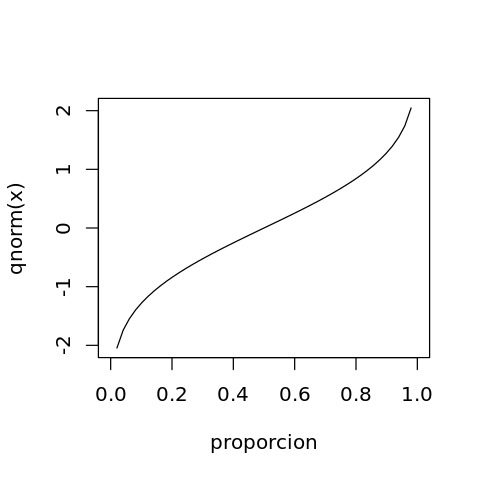

In [99]:
curve(qnorm, xlim=c(0,1), n = 50, xlab='proporcion')

* Otra definición teórica es: $q_p$ es el cuantil de orden $p$ para la variable aleatoria $X$ si: $$P(X \leq q_p) = p$$ donde: $p$ es la proporción.

Los cuantiles más comunes son el cuantil $.25$ (también llamado primer cuartil), el cuantil $.5$ (o mediana) y el cuantil $.75$ (también llamado tercer cuartil).

En la práctica, hay **$9$ diferentes tipos de fórmulas** en la función `quantile` de *R* para su cálculo y se pueden ver los detalles con `?quantile`. Por ejemplo:

Para los datos: $\{3, 4,4,5\}$ se tiene el primer, segundo y tercer cuartil:

In [100]:
vec<-c(3,4,4,5)
cuantiles <- quantile(vec,probs = c(.25,.5,.75))
print(cuantiles)

25% 50% 75% 
3.8 4.0 4.2 


A continuación se grafican los cuantiles para distribuciones conocidas:

In [101]:
options(repr.plot.width=5, repr.plot.height=4)#esta línea sólo se ejecuta para jupyterlab con R

### Normal

In [102]:
set.seed(2000)
n <- 500
vec<-rnorm(n)
vec_eval<-dnorm(vec)
proporcion<-seq(0,1,1/n)
cuantiles<-quantile(vec, probs=proporcion)

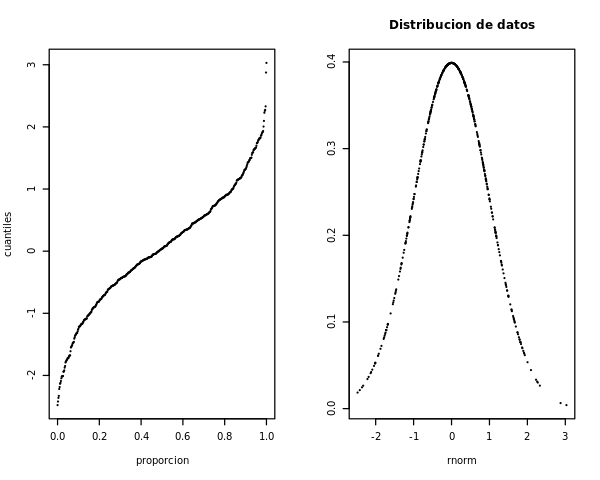

In [103]:
par(mfrow=c(1,2)) #subplots
par(cex=0.5) #control size of labels
plot(proporcion,cuantiles, cex = .1)
plot(vec,vec_eval, cex=.1, xlab='rnorm', ylab='', main='Distribucion de datos')

### Uniforme

In [104]:
set.seed(2000)
n <- 500
vec<-runif(n)
vec_eval<-dunif(vec)
proporcion<-seq(0,1,1/n)
cuantiles<-quantile(vec, probs=proporcion)

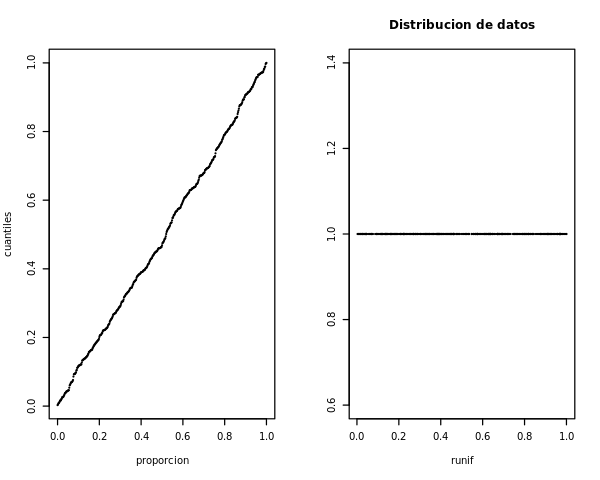

In [105]:
par(mfrow=c(1,2)) #subplots
par(cex=0.5) #control size of labels
plot(proporcion,cuantiles, cex = .1)
plot(vec,vec_eval, cex=.1, xlab='runif', ylab='', main='Distribucion de datos')

### Beta

In [106]:
set.seed(2000)
n <- 500
vec<-rbeta(n, shape1=.5,shape2=.5)
vec_eval<-dbeta(vec,shape1=.5,shape2=.5)
proporcion<-seq(0,1,1/n)
cuantiles<-quantile(vec, probs=proporcion)

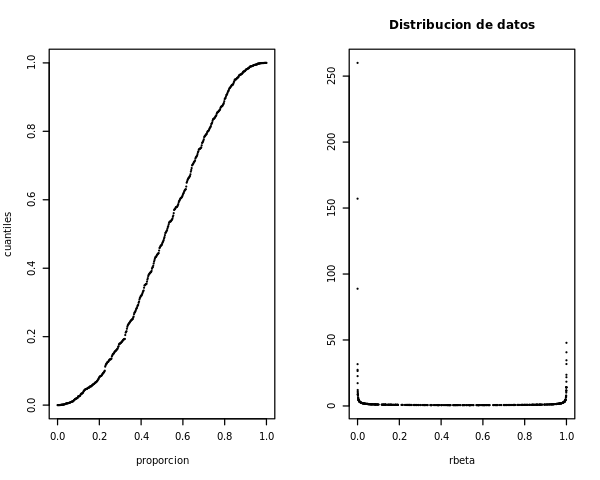

In [107]:
par(mfrow=c(1,2)) #subplots
par(cex=0.5) #control size of labels
plot(proporcion,cuantiles, cex = .1)
plot(vec,vec_eval, cex=.1, xlab='rbeta', ylab='', main='Distribucion de datos')

### Exponencial

In [108]:
set.seed(2000)
n <- 500
vec<-rexp(n)
vec_eval = dexp(vec)
proporcion<-seq(0,1,1/n)
cuantiles<-quantile(vec, probs=proporcion)

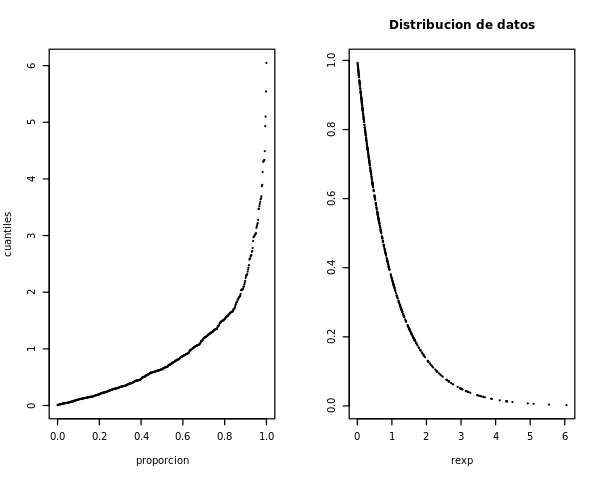

In [109]:
par(mfrow=c(1,2)) #subplots
par(cex=0.5) #control size of labels
plot(proporcion,cuantiles, cex = .1)
plot(vec,vec_eval, cex=.1, xlab='rexp', ylab='', main='Distribucion de datos')

### Ejemplo de distribución con dos modas

In [124]:
proporcion<-seq(0,1,1/n)
cuantiles<-quantile(faithful$eruptions, probs=proporcion)

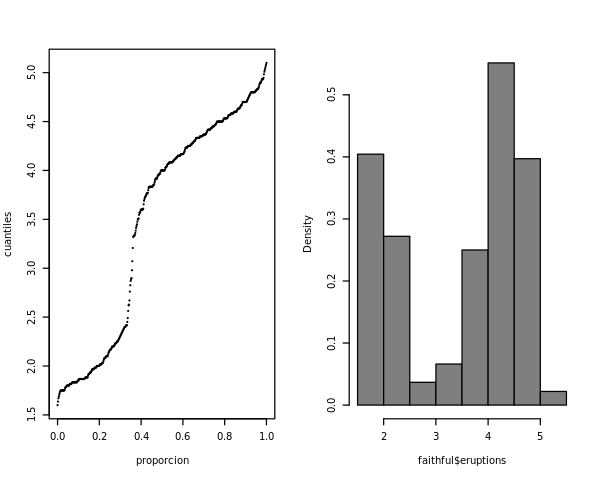

In [126]:
par(mfrow=c(1,2)) #subplots
par(cex=0.5) #control size of labels
plot(proporcion,cuantiles, cex = .1)
hist(faithful$eruptions,main='', col = 'gray50', prob=T)

A manera de resúmen de las gráficas de cuantiles anteriores:

* Datos concentrados en una región tienen pendientes bajas en la gráfica de cuantiles y por el contrario, datos dispersos tienen pendientes altas en la gráfica de cuantiles.

* La distribución uniforme genera gráficos de cuantiles en forma de línea recta de $45^{o}$.

* Las distribuciones sesgadas a la derecha tienen gráficos de cuantiles convexos y por el contrario distribuciones sesgadas a la izquierda tienen gráficos de cuantiles cóncavos. Y en general para un histograma: para valores crecientes en los que el histograma decrece se tiene convexidad y para valores crecientes en los que el histograma crece se tiene concavidad.

* Las distribuciones con más de una moda en las que se definen grupos tienen una separación en los gráficos de cuantiles por una pendiente alta entre cada grupo y presencia de concavidad y convexidad.

**Comentario:** si se tienen datos de dos variables: $x_1, x_2, \dots, x_n$ y $y_1, y_2, \dots, y_n$ se puede utilizar el comando `qqplot` para comparar los cuantiles de ambos conjuntos y lo que se estará haciendo es calcular las estadísticas de orden de ambos conjuntos de datos: $x_{(1)}, x_{(2)}, \dots,x_{(n)}$ y $y_{(1)}, y_{(2)}, \dots, y_{(n)}$ y se graficarán $(x_{(1)}, y_{(1)}), (x_{(2)}, y_{(2)}), \dots, (x_{(n)}, y_{(n)})$. Si siguen la forma de una línea recta entonces $x_{(k)} = y_{(k)}, \forall k=1,2,\dots, n$ y son parte de la misma población de datos (aunque datos reales nunca siguen una línea recta perfecta).

# Para más referencias sobre visualización:

* E. Tufte, Beautiful Evidence, 2006.

* W. Cleveland, Visualizing Data, 1993.

# Ejercicios

1) Considérese el experimento de lanzar $20$ veces una moneda y obtener la secuencia: $H,T,H,H,T,H,H,T,H,H,T,T,H,T,T,T,H,H,H,T$.

a) Tabular los resultados del experimento anterior encontrando las proporciones de $H$ y $T$ en los $20$ lanzamientos.

b) Graficar las proporciones con `barplot` y `plot`.

2) Para el dataset analizado anteriormente y que se creó: `log_mammals` realizar:

a)Para datos cuantitativos es común realizar diagramas de tallos y hojas. Investigar la interpretación de estos diagramas y usar la función `stem` del paquete `base` de *R* para realizar tales diagramas a las variables `log_body` y `log_brain` e interpretarlas.

b) `scatterplot` coloreando diferente a cada grupo que se creó: `mamífero pequeño` y `mamífero grande` con la variable `size`.

c) Instalar el paquete `dplyr` para colocar los datos en un formato `long` y se pueda graficar con el paquete de `ggplot2` con la función `gather` el dataframe `log_mammals`. Después de instalar tal paquete, realizar mismo enunciado que a) pero con `geom_points` y paquete `ggplot2`.

d) Calcular estadísticas como el promedio y mediana por grupos de `mamífero pequeño` y `mamífero grande` con `dplyr` y funciones como `group_by`, `sumarise` y el operador `%>%` (pipe). Ver como ayuda: [Data Wrangling with dplyr and tidyr](https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf) o [Data Transformation with dplyr](https://ugoproto.github.io/ugo_r_doc/dplyr.pdf) o bien como ejemplo de uso: https://genomicsclass.github.io/book/pages/dplyr_tutorial.html u otro tutorial en la red de `dplyr`.

In [112]:
head(log_mammals)

,log_body,log_brain,size,intervalo_body,intervalo_brain
,<dbl>,<dbl>,<chr>,<fct>,<fct>
Arctic fox,1.22,3.8,grande,"(0.202,1.7]","(3.03,4.53]"
Owl monkey,-0.73,2.7,pequenio,"(-1.3,0.202]","(1.53,3.03]"
Mountain beaver,0.30,2.1,pequenio,"(0.202,1.7]","(1.53,3.03]"
Cow,6.14,6.0,grande,"(4.7,6.2]","(6.03,7.53]"
Grey wolf,3.59,4.8,grande,"(3.2,4.7]","(4.53,6.03]"
Goat,3.32,4.7,grande,"(3.2,4.7]","(4.53,6.03]"


3) Considérese el dataset `randu` (ejecutar `?randu` para una descripción):

a) Usar la función `mean` para calcular la media muestral en cada uno de los números que forman la tripleta: $x, y, z$. Asimismo usar la función `var` para calcular una matriz de varianzas y covarianzas muestral. 

b) Queremos ver la distribución del promedio por renglón de cada observación del dataset `randu`, para esto utilizar la función de `apply` para calcular tal promedio, alternativamente usar `rowMeans`.

c) Utilizar la función `hist` del paquete base para calcular un histograma con los `breaks` definido por tal función. 

d) Calcular sus propios `breaks` y volver a graficar el histograma con `hist` y con `geom_histogram` del paquete `ggplot2`.

4) Realizar gráficas con el comando `qqplot` para comparar $2$ distribuciones de datos, por ejemplo:

In [127]:
options(repr.plot.width=4, repr.plot.height=4)#esta línea sólo se ejecuta para jupyterlab con R

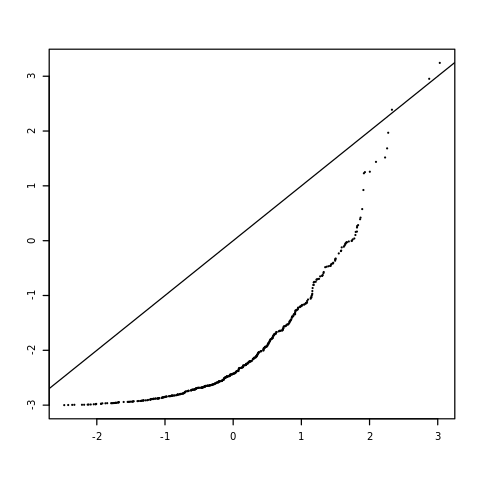

In [128]:
n<-500
set.seed(2000)
par(cex=0.5) #control size of labels
datos<- qqplot(rnorm(n), rexp(n)-3, cex=.1, xlab='', ylab='')
abline(0,1) #recta a 45 grados, sirve de apoyo para realizar comentarios

Realizar conclusiones de sus gráficas `qqplot`. Por ejemplo, sin utilizar la información de cuáles distribuciones se han generado los datos, ni cuáles están en el eje vertical ni horizontal del gráfico anterior se puede establecer: "en el gráfico anterior se observa que una de las distribuciones está sesgada respecto a la otra. Este tipo de gráfica es similar al de una distribución sesgada a la derecha por lo que o bien, la cola izquierda de la otra distribución está más cercana a la mediana o tiene colas ligeras".